# Student Scores: EDA

**Problem Questions**
- Is the test preparation course effective?
- Which test improved the most through the test prep course?
- What other factors have a significant impact on the exam scores?

# Load required Python packages

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
figures_folder = parent+'/figures'
print(path)
print(parent)
print(figures_folder)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/figures


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv',
 'prediction_dataframe.csv',
 '.ipynb_checkpoints']

# Load cleaned student scores into DataFrame

In [4]:
df = pd.read_csv(parent+'/data/interim/cleaned_student_scores.csv',index_col=0)

**Create Total Score Feature**

In [5]:
df['mean score'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,1)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7
1,female,group C,some college,standard,1,69,90,88,82.3
2,female,group B,master's degree,standard,0,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3
4,male,group C,some college,standard,0,76,78,75,76.3


In [7]:
df.shape

(9950, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9949
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       9950 non-null   object 
 1   race/ethnicity               9950 non-null   object 
 2   parental level of education  9950 non-null   object 
 3   lunch                        9950 non-null   object 
 4   test preparation course      9950 non-null   int64  
 5   math score                   9950 non-null   int64  
 6   reading score                9950 non-null   int64  
 7   writing score                9950 non-null   int64  
 8   mean score                   9950 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 777.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,9950.0,0.342010,0.474407,0.0,0.0,0.0,1.0,1.0
math score,9950.0,66.725829,15.147143,0.0,56.0,67.0,78.0,100.0
reading score,9950.0,69.590050,14.593892,15.0,60.0,70.0,80.0,100.0
writing score,9950.0,68.376281,15.309995,7.0,58.0,69.0,79.0,100.0
mean score,9950.0,68.230663,14.299933,9.0,58.7,68.3,78.7,100.0


In [10]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
gender,9950,2,male,5021
race/ethnicity,9950,5,group C,3132
parental level of education,9950,6,some college,2322
lunch,9950,2,standard,6450


## Convert object datatypes to categorical

In [11]:
obj_cols = ['gender','race/ethnicity','lunch']
df = df.astype({'gender':'category', 'race/ethnicity':'category','parental level of education':'category','lunch':'category'})

In [12]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
dtype: object

# Build data profile tables and plots

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,9950.0,0.342010,0.474407,0.0,0.0,0.0,1.0,1.0
math score,9950.0,66.725829,15.147143,0.0,56.0,67.0,78.0,100.0
reading score,9950.0,69.590050,14.593892,15.0,60.0,70.0,80.0,100.0
writing score,9950.0,68.376281,15.309995,7.0,58.0,69.0,79.0,100.0
mean score,9950.0,68.230663,14.299933,9.0,58.7,68.3,78.7,100.0


In [14]:
df.describe(include=['category']).T

,count,unique,top,freq
gender,9950,2,male,5021
race/ethnicity,9950,5,group C,3132
parental level of education,9950,6,some college,2322
lunch,9950,2,standard,6450


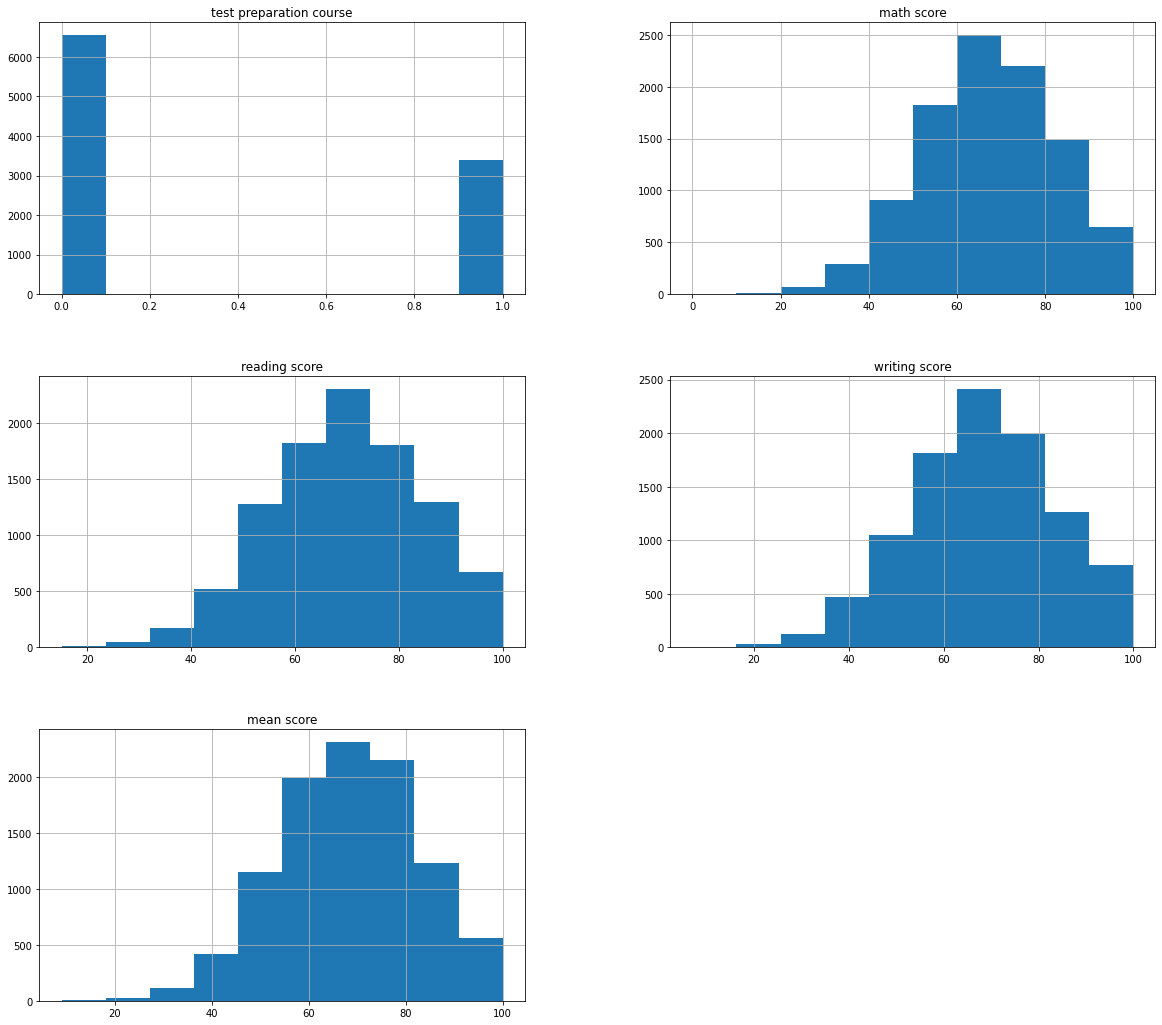

In [15]:
hist = df.hist(figsize=(20,18))

The math, reading, and writing score are used to calculated the mean score. All columns were left in for observational purposes.

The test scores all seem to have a close to normal distribution. This will be further examined.

# Anamolies & Outliers

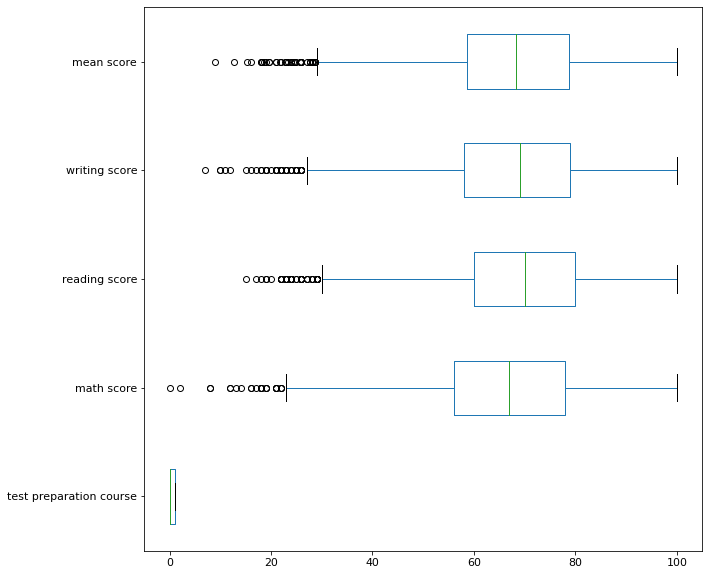

In [16]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

At this time, we will not remove outliers since we are searching for a solution for all students, not just the students performing within the norm.

Depending on prediction accuracy, we may revisit this step and try removing the outliers. Because of this, we will create a dataframe without outliers to save for later.

In [17]:
from scipy import stats
import numpy as np

#df_numeric = df[['reading score','writing score','math score']]

df_numeric = df[['mean score']]

# create array with z-scores
z = np.abs(stats.zscore(df_numeric))

# new dataframe without outliers
df_numeric_out = df_numeric[(z < 3).all(axis=1)]

In [18]:
df_numeric_out.shape

(9923, 1)

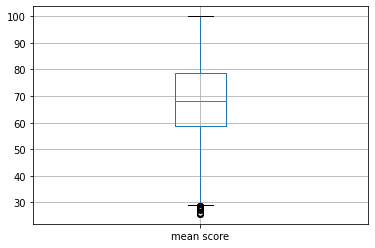

In [19]:
df_numeric_out.boxplot()

In [20]:
score_list=df_numeric[(z > 3).all(axis=1)].index

In [21]:
# Examine outliers (comment out when done)
#for score in score_list:
#    print(df.iloc[score])

In [22]:
# Merge dataframes to ensure remaining data is retained
df_NO = df_numeric_out.merge(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score']], how='left', left_index=True, right_index=True)
df_NO = df_NO[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','math score','reading score','writing score', 'mean score']]
df_NO.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7
1,female,group C,some college,standard,1,69,90,88,82.3
2,female,group B,master's degree,standard,0,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3
4,male,group C,some college,standard,0,76,78,75,76.3


In [23]:
df_NO.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean score'],
      dtype='object')

In [24]:
df_NO.shape

(9923, 9)

In [25]:
df_NO.to_csv('../data/interim/student_scores_no_outliers.csv')

**To predict students who may benefit from additional support, we will focus on 'total score' as our dependent variable.**

mean: 68.2306633165829
median: 68.3
standard deviation: 14.299933312262697
variance: 204.48809273516036


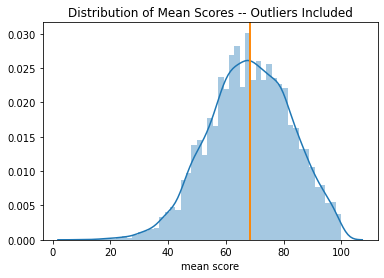

In [26]:
# Examine distribution of mean score with outliers

#hist = df['mean score'].hist()
sns.distplot(df['mean score'])
plt.title('Distribution of Mean Scores -- Outliers Included')
plt.axvline(x=df['mean score'].mean(), color='red')
plt.axvline(x=df['mean score'].median(), color='orange')

print('mean: {}'.format(df['mean score'].mean()))
print('median: {}'.format(df['mean score'].median()))
print('standard deviation: {}'.format(df['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df['mean score'])))

mean: 68.360092713897
median: 68.3
standard deviation: 14.100643932605363
variance: 198.82815931412046


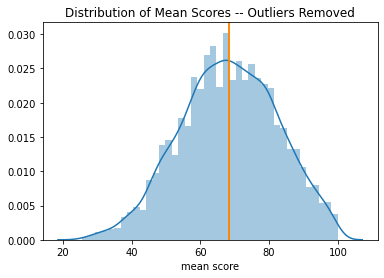

In [27]:
# Examine distribution of mean score with outliers REMOVED

#hist = df_NO['mean score'].hist()
sns.distplot(df_NO['mean score'])
plt.title('Distribution of Mean Scores -- Outliers Removed')
plt.axvline(x=df_NO['mean score'].mean(), color='red')
plt.axvline(x=df_NO['mean score'].median(), color='orange')

print('mean: {}'.format(df_NO['mean score'].mean()))
print('median: {}'.format(df_NO['mean score'].median()))
print('standard deviation: {}'.format(df_NO['mean score'].std()))
import statistics
print('variance: {}'.format(statistics.variance(df_NO['mean score'])))

# Explore data relationships

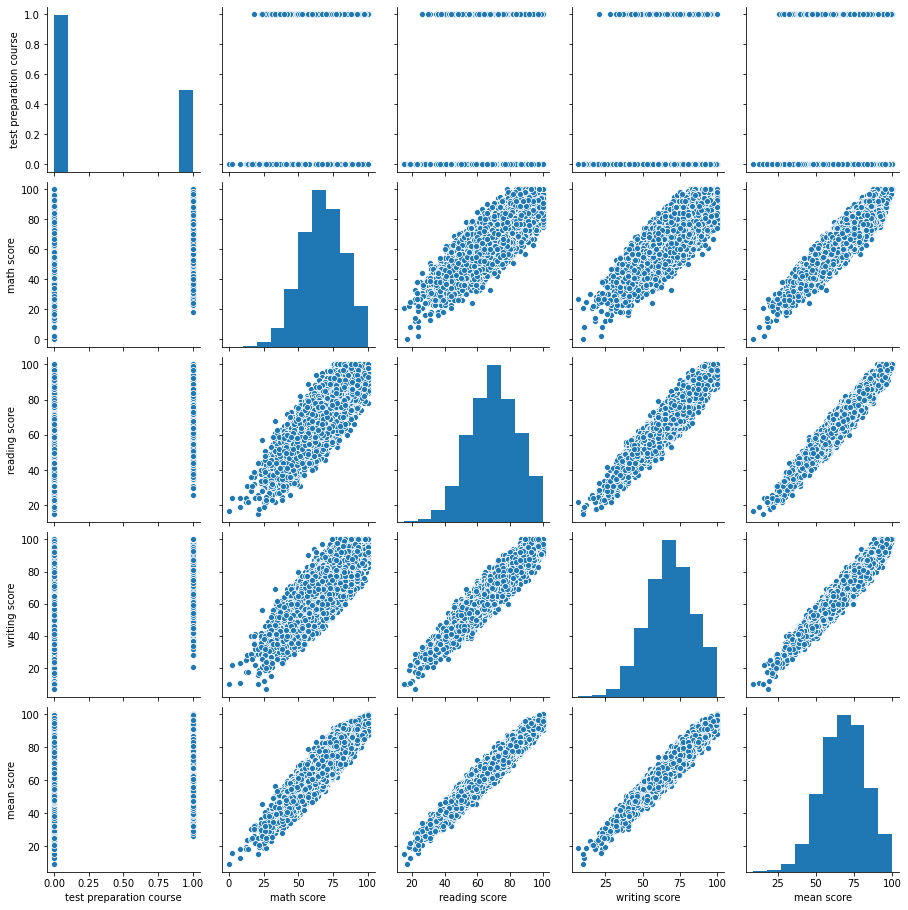

In [28]:
g = sns.pairplot(df)

In [29]:
def education(x):
    if x == 'some high school':
        return 0
    elif x == 'high school':
        return 0
    else:
        return 1

    
df['education'] = df['parental level of education'].apply(education)

In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,education
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7,1
1,female,group C,some college,standard,1,69,90,88,82.3,1
2,female,group B,master's degree,standard,0,90,95,93,92.7,1
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3,1
4,male,group C,some college,standard,0,76,78,75,76.3,1
...,...,...,...,...,...,...,...,...,...,...
9945,female,group E,some college,standard,1,77,86,87,83.3,1
9946,female,group D,some college,free/reduced,0,41,50,53,48.0,1
9947,male,group A,associate's degree,free/reduced,1,77,84,81,80.7,1
9948,female,group D,associate's degree,free/reduced,1,60,68,75,67.7,1


## Distribution of scores

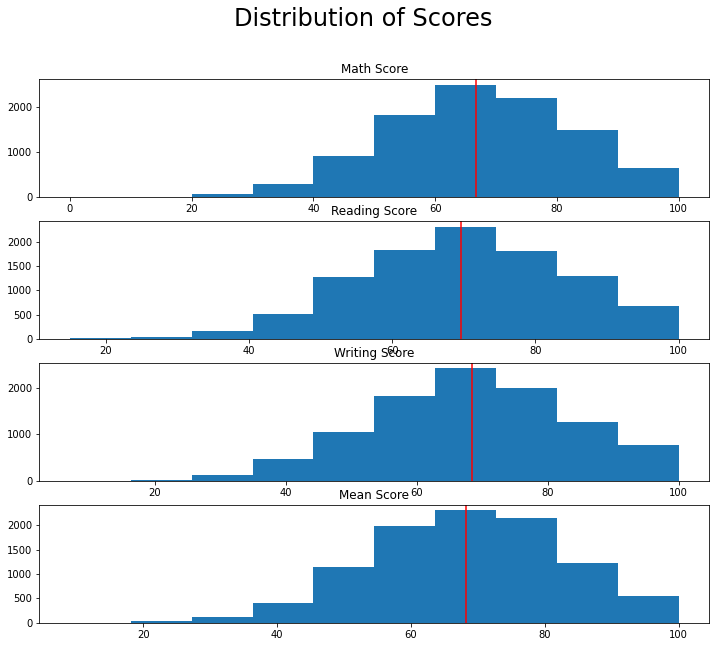

In [31]:
fig, axs = plt.subplots(4,figsize=(12,10))
fig.suptitle('Distribution of Scores',size=24)

axs[0].hist(df['math score'])
axs[0].set_title('Math Score')
axs[0].axvline(df['math score'].mean(), c='red')

axs[1].hist(df['reading score'])
axs[1].set_title('Reading Score')
axs[1].axvline(df['reading score'].mean(), c='red')

axs[2].hist(df['writing score'])
axs[2].set_title('Writing Score')
axs[2].axvline(df['writing score'].mean(), c='red')

axs[3].hist(df['mean score'])
axs[3].set_title('Mean Score')
axs[3].axvline(df['mean score'].mean(), c='red')


## H0: Mean exam score of students taking test prep = mean exam score of students who did not take test prep.
## H1: Mean exam score of students taking test prep > mean exam score of students who did not take test prep.
### The difference between sample means is statistically significant and therefore the null hypothesis can be rejected and the alternative hypothesis can be accepted.

Test Prep / Yellow
test prep mean: 73.14610637672641
test prep median: 73.7
test prep standard deviation: 13.509755613629856
test prep variance: 182.5134967400034

No Test Prep / Teal
no test prep mean: 65.67571406751185
no test prep median: 66.0
no test prep standard deviation: 14.030334528255311
no test prep variance: 196.8502869747532

P-value: 6.418992469763464e-141
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.


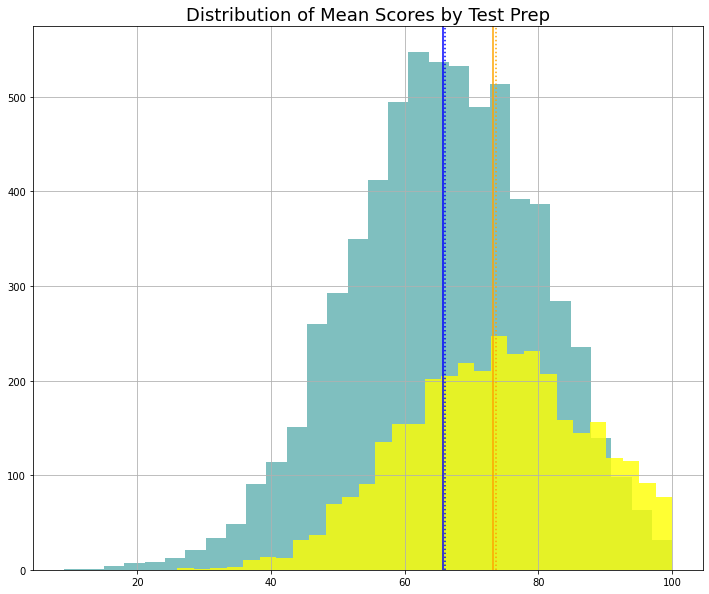

In [32]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]

plt.figure(figsize=(12,10))
hist = no_prep['mean score'].hist(bins=30, color='teal',alpha=0.5)
hist = prep['mean score'].hist(bins=30, color='yellow',alpha=0.8)

plt.title('Distribution of Mean Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['mean score'].mean(), color='orange')
plt.axvline(x=prep['mean score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['mean score'].mean(), color='blue')
plt.axvline(x=no_prep['mean score'].median(), linestyle='dotted',color='blue')

print('Test Prep / Yellow')
print('test prep mean: {}'.format(prep['mean score'].mean()))
print('test prep median: {}'.format(prep['mean score'].median()))
print('test prep standard deviation: {}'.format(prep['mean score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['mean score'])))

print('No Test Prep / Teal')
print('no test prep mean: {}'.format(no_prep['mean score'].mean()))
print('no test prep median: {}'.format(no_prep['mean score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['mean score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['mean score'],b=no_prep['mean score'],equal_var=False,alternative='greater')
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.')

Test Prep / Yellow
test prep mean: 70.2606523655598
test prep median: 71.0
test prep standard deviation: 14.646288164961659
test prep variance: 214.51375701109598

No Test Prep / Teal
no test prep mean: 64.88849854895372
no test prep median: 65.0
no test prep standard deviation: 15.078269185845205
no test prep variance: 227.35420164080907

P-value: 3.7421585894953563e-65
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.
Average point difference: 5.372153816606087


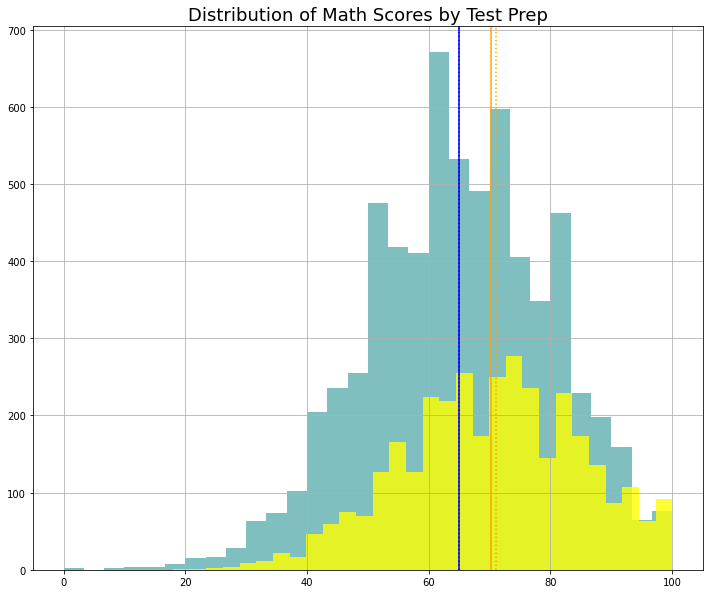

In [33]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]

plt.figure(figsize=(12,10))
hist = no_prep['math score'].hist(bins=30, color='teal',alpha=0.5)
hist = prep['math score'].hist(bins=30, color='yellow',alpha=0.8)

plt.title('Distribution of Math Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['math score'].mean(), color='orange')
plt.axvline(x=prep['math score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['math score'].mean(), color='blue')
plt.axvline(x=no_prep['math score'].median(), linestyle='dotted',color='blue')

print('Test Prep / Yellow')
print('test prep mean: {}'.format(prep['math score'].mean()))
print('test prep median: {}'.format(prep['math score'].median()))
print('test prep standard deviation: {}'.format(prep['math score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['math score'])))

print('No Test Prep / Teal')
print('no test prep mean: {}'.format(no_prep['math score'].mean()))
print('no test prep median: {}'.format(no_prep['math score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['math score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['math score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['math score'],b=no_prep['math score'],equal_var=False,alternative='greater')
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.')
print('Average point difference: {}'.format(prep['math score'].mean()-no_prep['math score'].mean()))

Test Prep / Yellow
test prep mean: 74.20099911842492
test prep median: 75.0
test prep standard deviation: 13.906766447615054
test prep variance: 193.39815302851187

No Test Prep / Teal
no test prep mean: 67.19337100962272
no test prep median: 67.0
no test prep standard deviation: 14.366430174689365
no test prep variance: 206.39431596422511

P-value: 1.1353794531363644e-118
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.
Average point difference: 7.007628108802194


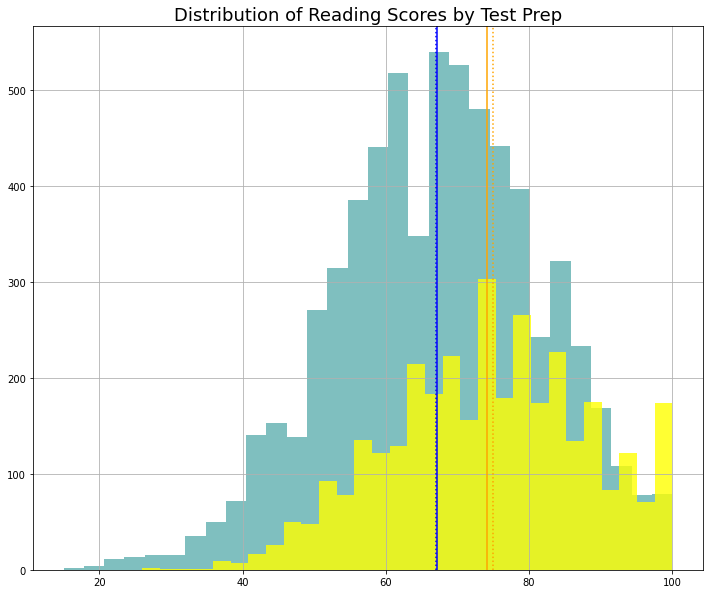

In [34]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]

plt.figure(figsize=(12,10))
hist = no_prep['reading score'].hist(bins=30, color='teal',alpha=0.5)
hist = prep['reading score'].hist(bins=30, color='yellow',alpha=0.8)

plt.title('Distribution of Reading Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['reading score'].mean(), color='orange')
plt.axvline(x=prep['reading score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['reading score'].mean(), color='blue')
plt.axvline(x=no_prep['reading score'].median(), linestyle='dotted',color='blue')

print('Test Prep / Yellow')
print('test prep mean: {}'.format(prep['reading score'].mean()))
print('test prep median: {}'.format(prep['reading score'].median()))
print('test prep standard deviation: {}'.format(prep['reading score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['reading score'])))

print('No Test Prep / Teal')
print('no test prep mean: {}'.format(no_prep['reading score'].mean()))
print('no test prep median: {}'.format(no_prep['reading score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['reading score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['reading score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['reading score'],b=no_prep['reading score'],equal_var=False,alternative='greater')
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.')
print('Average point difference: {}'.format(prep['reading score'].mean()-no_prep['reading score'].mean()))

Test Prep / Yellow
test prep mean: 74.97707904789891
test prep median: 76.0
test prep standard deviation: 14.11344616939904
test prep variance: 199.18936277652443

No Test Prep / Teal
no test prep mean: 64.9453184664732
no test prep median: 65.0
no test prep standard deviation: 14.775147505476381
no test prep variance: 218.304983808585

P-value: 5.827710671812891e-224
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.
Average point difference: 10.031760581425715


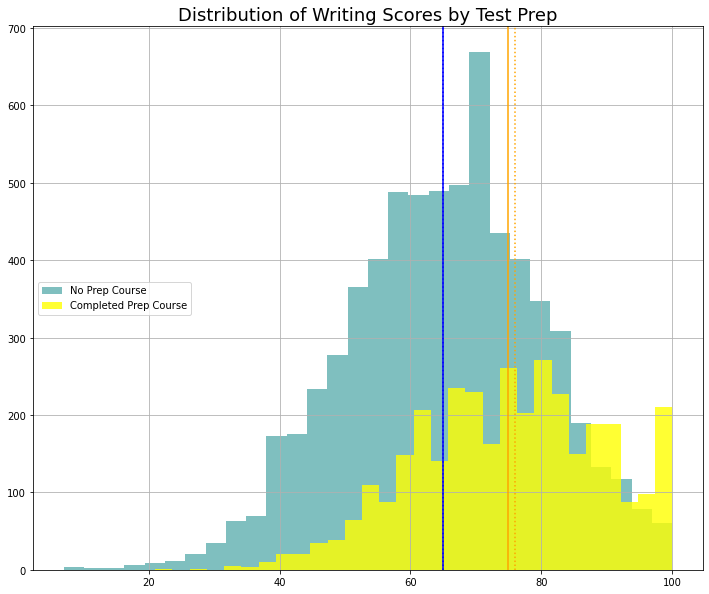

In [35]:
# Compare test prep distribution
prep = df[df['test preparation course'] == 1]             
no_prep = df[df['test preparation course'] == 0]

plt.figure(figsize=(12,10))
hist = no_prep['writing score'].hist(bins=30, color='teal',alpha=0.5,label='No Prep Course')
hist = prep['writing score'].hist(bins=30, color='yellow',alpha=0.8, label='Completed Prep Course')

plt.title('Distribution of Writing Scores by Test Prep', fontsize=18)
plt.axvline(x=prep['writing score'].mean(), color='orange')
plt.axvline(x=prep['writing score'].median(), linestyle='dotted',color='orange')
plt.axvline(x=no_prep['writing score'].mean(), color='blue')
plt.axvline(x=no_prep['writing score'].median(), linestyle='dotted',color='blue')

plt.legend(loc='center left')

plt.savefig(figures_folder+'/EDA_distribution_writing_scores.png')

print('Test Prep / Yellow')
print('test prep mean: {}'.format(prep['writing score'].mean()))
print('test prep median: {}'.format(prep['writing score'].median()))
print('test prep standard deviation: {}'.format(prep['writing score'].std()))
print('test prep variance: {}\n'.format(statistics.variance(prep['writing score'])))

print('No Test Prep / Teal')
print('no test prep mean: {}'.format(no_prep['writing score'].mean()))
print('no test prep median: {}'.format(no_prep['writing score'].median()))
print('no test prep standard deviation: {}'.format(no_prep['writing score'].std()))
print('no test prep variance: {}'.format(statistics.variance(no_prep['writing score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=prep['writing score'],b=no_prep['writing score'],equal_var=False,alternative='greater')
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal and we can accept that the test prep mean is greater than the non-test prep mean.')
print('Average point difference: {}'.format(prep['writing score'].mean()-no_prep['writing score'].mean()))

**Observation: In each exam, as well as the combined score of all exams (average), the mean score of those who have not taken the exam prep course is failing, while the mean score of those who have taken the exam prep course is passing. This is important information for a school board to know when determining the effectiveness of the test prep course.**

In this case, the course improves the exam average scores in the following order:
- Writing ~10 points
- Reading ~7 points
- Math ~5 to 6 points

## How does the test preparation course affect exam scores in each category?

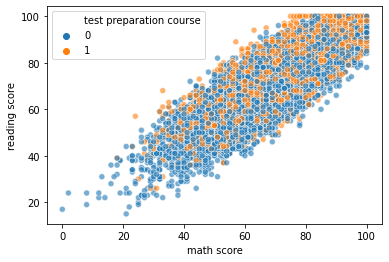

In [36]:
sns.scatterplot(x='math score',y='reading score',data=df,hue='test preparation course',alpha=0.6)

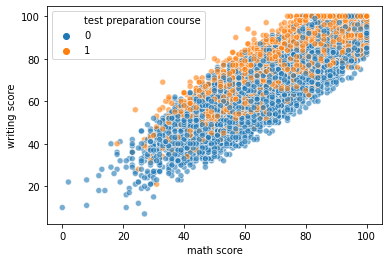

In [37]:
sns.scatterplot(x='math score',y='writing score',data=df,hue='test preparation course',alpha=0.6)

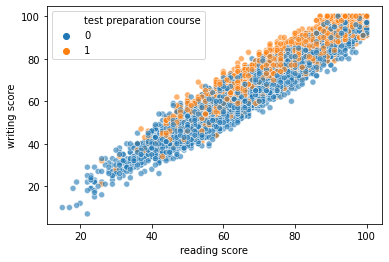

In [38]:
sns.scatterplot(x='reading score',y='writing score',data=df,hue='test preparation course',alpha=0.6)

In [39]:
scores = df[['writing score','reading score','math score','mean score','test preparation course']]
scores_melt = scores.melt(id_vars=['test preparation course'],value_vars=['writing score','reading score','math score','mean score'])

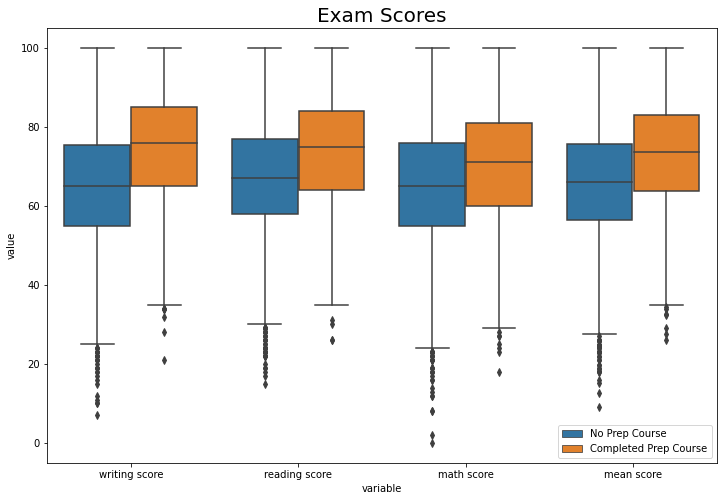

In [40]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="variable", y="value", data=scores_melt, hue='test preparation course')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Prep Course','Completed Prep Course'])
plt.title('Exam Scores',size=20)

plt.savefig(figures_folder+'/EDA_exam_scores_boxplots.png')

**Observation: As can be seen in the boxplots, the test preparation course had the most affect on the writing score, then the reading score, and finally the math score. Mean score was shown for reference.**

## How does gender and test prep relate to mean score?

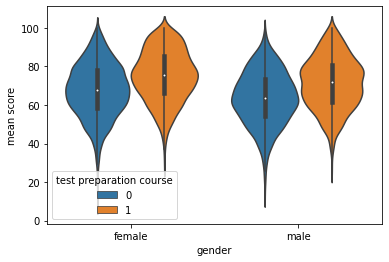

In [41]:
sns.violinplot(x='gender',y='mean score',data=df,hue='test preparation course')

## H0: Do students who have free/reduced lunch and those who have standard lunch have the same exam score sample mean?
### The difference between sample means is statistically significant and therefore, this hypothesis can be rejected.

Free Lunch / Orange and Red
free lunch mean: 61.872257142857144
free lunch median: 61.7
free lunch standard deviation: 13.747686715107363
free lunch variance: 188.99889001673947

Standard Lunch / Purple and Blue
standard lunch mean: 71.68096124031007
standard lunch median: 71.7
standard lunch standard deviation: 13.38190932911487
standard lunch variance: 179.0754972926516

P-value: 1.5180904389259044e-238
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


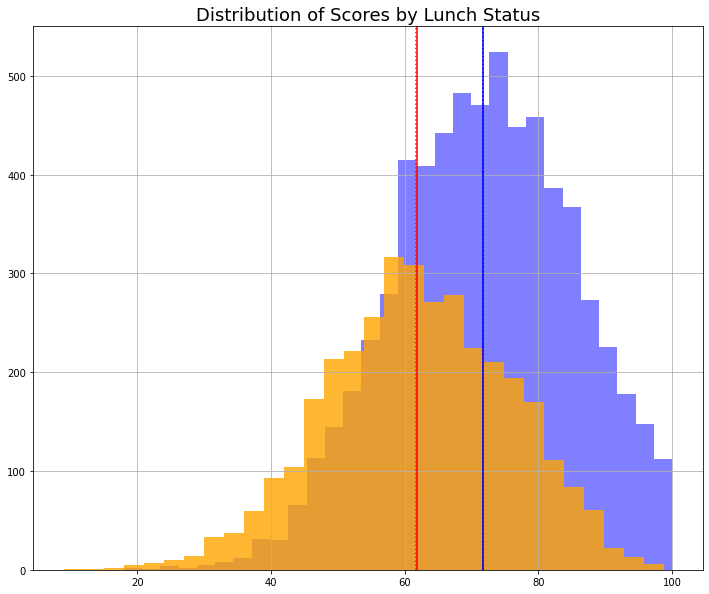

In [42]:
# Compare lunch status distribution without outliers
free = df[df['lunch'] == 'free/reduced']             
standard = df[df['lunch'] == 'standard']


plt.figure(figsize=(12,10))
hist = standard['mean score'].hist(bins=30, color='blue',alpha=0.5)
hist = free['mean score'].hist(bins=30, color='orange',alpha=0.8)

plt.title('Distribution of Scores by Lunch Status', fontsize=18)
plt.axvline(x=free['mean score'].mean(), color='red')
plt.axvline(x=free['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=standard['mean score'].mean(), color='blue')
plt.axvline(x=standard['mean score'].median(), linestyle='dotted',color='blue')

print('Free Lunch / Orange and Red')
print('free lunch mean: {}'.format(free['mean score'].mean()))
print('free lunch median: {}'.format(free['mean score'].median()))
print('free lunch standard deviation: {}'.format(free['mean score'].std()))
print('free lunch variance: {}\n'.format(statistics.variance(free['mean score'])))

print('Standard Lunch / Purple and Blue')
print('standard lunch mean: {}'.format(standard['mean score'].mean()))
print('standard lunch median: {}'.format(standard['mean score'].median()))
print('standard lunch standard deviation: {}'.format(standard['mean score'].std()))
print('standard lunch variance: {}'.format(statistics.variance(standard['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=free['mean score'],b=standard['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

## H0: Do students whose parents obtained an education at or below high school and those whose parents obtained an education above high school have the same exam score sample mean?
### The difference between sample means is statistically significant and therefore, this hypothesis can be rejected.

Further Education / Orange and Red
further education mean: 70.34890118834444
further education median: 70.7
further education standard deviation: 13.972760575915421
further education variance: 195.2380381118563

High School / Purple and Blue
high school mean: 64.81266088783819
high school median: 65.0
high school standard deviation: 14.161264265887572
high school variance: 200.5414056083043

P-value: 3.6904390557709215e-79
The p-value is less than the 5% confidence interval.
This means we can reject the null hypothesis stating that the two sample means are equal.


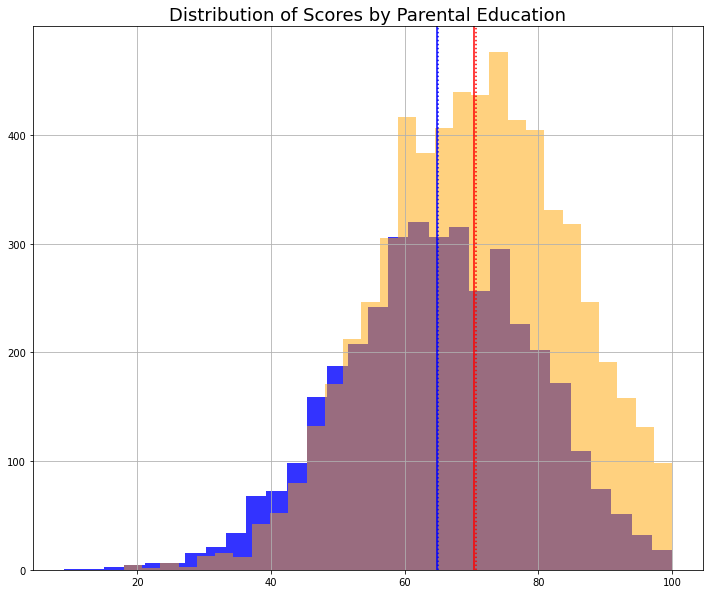

In [43]:
# Compare further education distribution without outliers
further = df[df['education'] == 1]             
high_school = df[df['education'] == 0]


plt.figure(figsize=(12,10))
hist = high_school['mean score'].hist(bins=30, color='blue',alpha=0.8)
hist = further['mean score'].hist(bins=30, color='orange',alpha=0.5)

plt.title('Distribution of Scores by Parental Education', fontsize=18)
plt.axvline(x=further['mean score'].mean(), color='red')
plt.axvline(x=further['mean score'].median(), linestyle='dotted',color='red')
plt.axvline(x=high_school['mean score'].mean(), color='blue')
plt.axvline(x=high_school['mean score'].median(), linestyle='dotted',color='blue')

print('Further Education / Orange and Red')
print('further education mean: {}'.format(further['mean score'].mean()))
print('further education median: {}'.format(further['mean score'].median()))
print('further education standard deviation: {}'.format(further['mean score'].std()))
print('further education variance: {}\n'.format(statistics.variance(further['mean score'])))

print('High School / Purple and Blue')
print('high school mean: {}'.format(high_school['mean score'].mean()))
print('high school median: {}'.format(high_school['mean score'].median()))
print('high school standard deviation: {}'.format(high_school['mean score'].std()))
print('high school variance: {}'.format(statistics.variance(high_school['mean score'])))

# Two-Sample T-Test
# 5% confidence interval
# Such a test tells us whether two data samples have different means.
# Here, we take the null hypothesis that both groups have equal means.
# We don’t need a known population parameter for this.

results = stats.ttest_ind(a=further['mean score'],b=high_school['mean score'],equal_var=False)
print('\nP-value: {}'.format(results[1]))
print('The p-value is less than the 5% confidence interval.')
print('This means we can reject the null hypothesis stating that the two sample means are equal.')

## How does race/ethnicity compare to average exam scores?

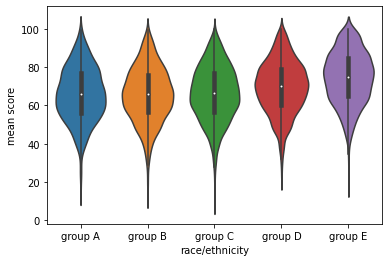

In [44]:
sns.violinplot(x='race/ethnicity',y='mean score',data=df)

In [45]:
df.groupby(['race/ethnicity']).mean()['mean score']

race/ethnicity
group A    65.952121
group B    65.799849
group C    66.453927
group D    69.619878
group E    74.452988
Name: mean score, dtype: float64

**As can be seen above, Group A, B, and C have very similar means. Group D has a slightly higher mean, with Group E having the highest.** To ensure that bias based on race/ethnicity is not present in the algorithm and so that all students have a fair representation of pass/fail, these features will be removed. In the world of teaching (and pretty much anything), race/ethnicity is NOT an indicator of pass/fail.

## How does parental level of education relate to mean score?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

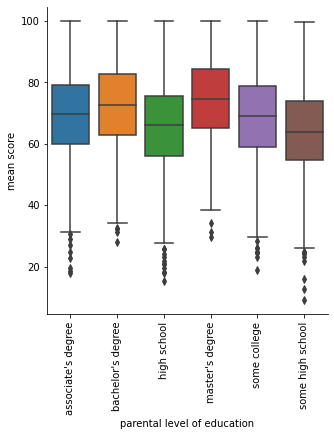

In [46]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box')
plt.xticks(rotation=90)

## How does parental level of education and lunch status relate to mean score?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

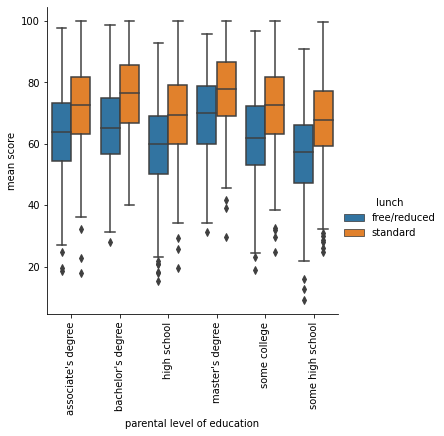

In [47]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box',hue='lunch')
plt.xticks(rotation=90)

## How does parental level of education and test prep course relate to mean score?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

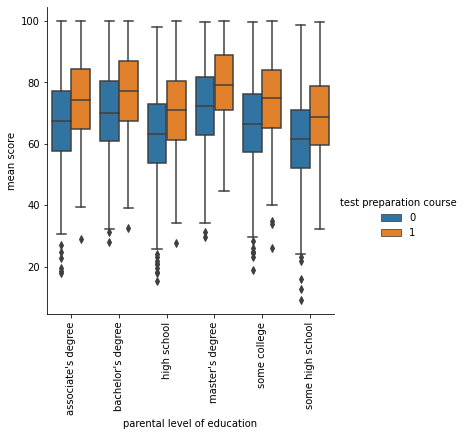

In [48]:
sns.catplot(x='parental level of education',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

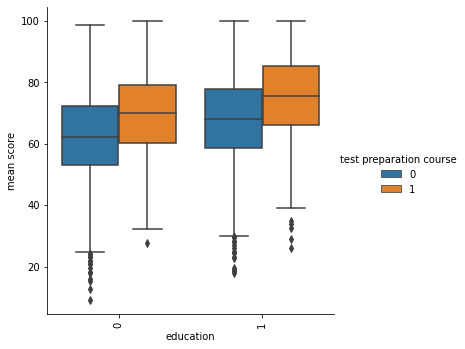

In [49]:
sns.catplot(x='education',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

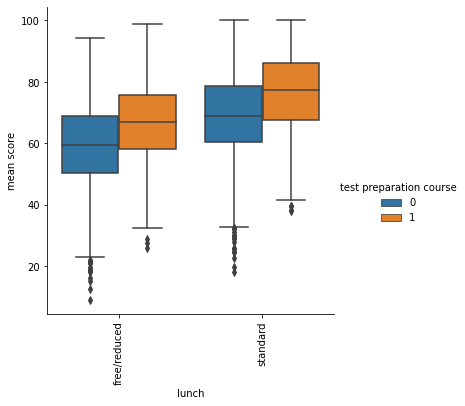

In [50]:
sns.catplot(x='lunch',y='mean score',data=df,kind='box', hue='test preparation course')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

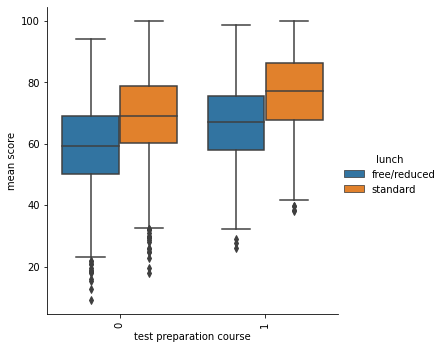

In [51]:
sns.catplot(x='test preparation course',y='mean score',data=df,kind='box', hue='lunch')
plt.xticks(rotation=90)

# Feature Selection and Engineering
**Mean score** has already been created by taking the mean (average) of the three test scores (reading, writing, math).


In [52]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
mean score                      float64
education                         int64
dtype: object

In [53]:
# Correlation Matrix
corr_all = df.corr(method='pearson')
corr_all.round(2).style.background_gradient(cmap='coolwarm')

,test preparation course,math score,reading score,writing score,mean score,education
test preparation course,1.000000,0.170000,0.230000,0.310000,0.250000,0.000000
math score,0.170000,1.000000,0.820000,0.810000,0.920000,0.160000
reading score,0.230000,0.820000,1.000000,0.950000,0.970000,0.170000
writing score,0.310000,0.810000,0.950000,1.000000,0.970000,0.200000
mean score,0.250000,0.920000,0.970000,0.970000,1.000000,0.190000
education,0.000000,0.160000,0.170000,0.200000,0.190000,1.000000


Observations:
- The test preparation course and higher education of parents have the highest correlations with writing scores.
- Both education and the test preparation course have a positive correlation, suggesting that both of these features contribute to higher scores.
- Higher parental education suggests these homes have parents within professional careers, which has a positive effect on student scores. This is in line with a study done by Betty Hart and Todd Risley in the mid-1980's. Details below.

According to the study, "Children in professionals' homes were exposed to an average of more than fifteen hundred more spoken words per hour than children in welfare homes. Over one year, that amounted to a difference of nearly 8 million words, which, by age four, amounted to a total gap of 32 million words. They also found a substantial gap in tone and in the complexity of words being used. As they crunched the numbers, they discovered a direct correlation between the intensity of these early verbal experiences and later achievement." An article by The Atlantic about this study can be found [here](https://www.theatlantic.com/technology/archive/2010/03/the-32-million-word-gap/36856/).

In [54]:
# Without Outliers
corr_NO = df_NO.corr(method='pearson')
corr_NO.round(2).style.background_gradient(cmap='coolwarm')

,test preparation course,math score,reading score,writing score,mean score
test preparation course,1.000000,0.160000,0.220000,0.310000,0.250000
math score,0.160000,1.000000,0.820000,0.800000,0.920000
reading score,0.220000,0.820000,1.000000,0.950000,0.970000
writing score,0.310000,0.800000,0.950000,1.000000,0.970000
mean score,0.250000,0.920000,0.970000,0.970000,1.000000


We notice that when outliers are dropped, there is a major decrease in correlation between test scores and the mean score. Due to this, we are going to keep outliers in for future analysis.

### Predicted Variable: Grade

In [55]:
'''def set_grade(score):
    if score >= 90:
        return 'A'
    elif score >=80:
        return 'B'
    elif score >=70:
        return 'C'
    elif score >=60:
        return 'D'
    else:
        return 'F'
'''

def set_grade(score):
    if score >= 69.5:
        return 'pass'
    else:
        return 'fail'
df['Pass Mean Exam'] = df['mean score'].apply(set_grade)
df['Pass Math'] = df['math score'].apply(set_grade)
df['Pass Reading'] = df['reading score'].apply(set_grade)
df['Pass Writing'] = df['writing score'].apply(set_grade)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,education,Pass Mean Exam,Pass Math,Pass Reading,Pass Writing
0,female,group B,bachelor's degree,standard,0,72,72,74,72.7,1,pass,pass,pass,pass
1,female,group C,some college,standard,1,69,90,88,82.3,1,pass,fail,pass,pass
2,female,group B,master's degree,standard,0,90,95,93,92.7,1,pass,pass,pass,pass
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.3,1,fail,fail,fail,fail
4,male,group C,some college,standard,0,76,78,75,76.3,1,pass,pass,pass,pass


### Remove redundant variables
When creating a model in the next couple notebooks, the total score will be the predicted variable. Due to this, all highly correlated (above 95%) features will be removed to ensure appropriate prediction using features unknown prior to the testing.

Due to needing these for the predictions later on, we will keep these redundant variables and remove them before splitting the data.

In [56]:
# Drop score-related variables, keeping total score
#df = df.drop(['math score','writing score','reading score'], axis=1)

In [57]:
#df.shape

## Save total student score data to new csv

In [58]:
df.to_csv(parent+'/data/interim/total_student_scores_without_dummies.csv')